In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
os.chdir(path)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import bamboolib

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


In [15]:
df = pd.read_csv('./data/metro_CA_2011_2018_lagged.csv', index_col = None)
# drop missing data after lagging and keep only dataset lagged by 1 year
df = df.iloc[:, :-4].dropna()

df["year"]= pd.to_datetime(df["year"], format = "%Y").dt.year
df.sort_values("year", ignore_index = True, inplace = True)
df.head()

dem = [ 'not_us_citizen_pop',
        'median_age',
        'amerindian_including_hispanic',
        'amerindian_pop', 
        'asian_including_hispanic',
        'asian_male_45_54',
        'asian_male_55_64',
        'asian_pop',
        'black_including_hispanic',
         'black_male_45_54',
         'black_male_55_64',
         'black_pop',
         'white_including_hispanic',
 'white_male_45_54',
 'white_male_55_64',
 'white_pop',
   'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_5_to_9',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
       'female_pop',
 'female_under_5',
       'hispanic_any_race',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'hispanic_pop',
       'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_64_associates_degree',
 'male_45_64_bachelors_degree',
 'male_45_64_grade_9_12',
 'male_45_64_graduate_degree',
 'male_45_64_high_school',
 'male_45_64_less_than_9_grade',
 'male_45_64_some_college',
 'male_45_to_49',
 'male_45_to_64',
 'male_50_to_54',
 'male_55_to_59',
 'male_5_to_9',
 'male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'male_pop',
 'male_under_5',
  'not_hispanic_pop',
  'other_race_pop',
       'pop_15_and_over',
 'pop_16_over',
 'pop_25_64',
 'pop_25_years_over',
 'pop_5_years_over',
       'population_1_year_and_over',
 'population_3_years_over',
       'speak_only_english_at_home',
 'speak_spanish_at_home',
 'speak_spanish_at_home_low_english',
   'two_or_more_races_pop',
     'total_pop'       
      ]
commute = ['no_car',
 'no_cars',
     'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
    'four_more_cars',
            'one_car',
           'three_cars',
 'two_cars',
 'walked_to_work',
           'aggregate_travel_time_to_work',
]
occ = ['not_in_labor_force',
       'pop_in_labor_force',
       'unemployed_pop',
    'armed_forces',
       'civilian_labor_force',
       'employed_agriculture_forestry_fishing_hunting_mining',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_construction',
 'employed_education_health_social',
 'employed_finance_insurance_real_estate',
 'employed_information',
 'employed_manufacturing',
 'employed_other_services_not_public_admin',
 'employed_pop',
 'employed_public_administration',
 'employed_retail_trade',
 'employed_science_management_admin_waste',
 'employed_transportation_warehousing_utilities',
       'employed_wholesale_trade',
       'employed_transportation_warehousing_utilities',
       'graduate_professional_degree',
       'management_business_sci_arts_employed',
 'occupation_management_arts',
 'occupation_natural_resources_construction_maintenance',
 'occupation_production_transportation_material',
 'occupation_sales_office',
 'occupation_services',
  'sales_office_employed',
       'worked_at_home',
 'workers_16_and_over', 
      ]
ed = ['associates_degree',
      'bachelors_degree',
      'bachelors_degree_2',
      'bachelors_degree_or_higher_25_64',
      'group_quarters',
      'high_school_diploma',
      'high_school_including_ged',
      'masters_degree',
      'one_year_more_college',
      'some_college_and_associates_degree',
      'in_grades_1_to_4',
 'in_grades_5_to_8',
 'in_grades_9_to_12',
 'in_school',
 'in_undergrad_college',
       'less_one_year_college',
 'less_than_high_school_graduate'
      ]
income = ['year',
          'median_income',
          'percent_income_spent_on_rent',
          'pop_determined_poverty_status',
          'poverty',
          'rent_10_to_15_percent',
 'rent_15_to_20_percent',
 'rent_20_to_25_percent',
 'rent_25_to_30_percent',
 'rent_30_to_35_percent',
 'rent_35_to_40_percent',
 'rent_40_to_50_percent',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_under_10_percent',
'renter_occupied_housing_units_paying_cash_median_gross_rent',
          'income_100000_124999',
 'income_10000_14999',
 'income_125000_149999',
 'income_150000_199999',
 'income_15000_19999',
 'income_200000_or_more',
 'income_20000_24999',
 'income_25000_29999',
 'income_30000_34999',
 'income_35000_39999',
 'income_40000_44999',
 'income_45000_49999',
 'income_50000_59999',
 'income_60000_74999',
 'income_75000_99999',
 'income_less_10000',
 'income_per_capita',
]
ar = ['avg_rent',
       'median_rent',
    'vacant_housing_units',
     'vacant_housing_units_for_rent',
     'vacant_housing_units_for_sale',
]
hh = [ 'married_households',
      'pop_divorced',
      'children',
      'children_in_single_female_hh',
      'families_with_young_children',
      'family_households',
      'father_in_labor_force_one_parent_families_with_young_children',
      'father_one_parent_families_with_young_children',
      'female_female_households',
       'male_male_households',
      'nonfamily_households',
  'one_parent_families_with_young_children',
 'pop_never_married',
 'pop_now_married',
 'pop_separated',
 'pop_widowed',
  'two_parent_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_parents_not_in_labor_force_families_with_young_children',
      'households',
 'households_public_asst_or_food_stamps',
 'households_retirement_income',
 'housing_built_1939_or_earlier',
 'housing_built_2000_to_2004',
 'housing_built_2005_or_later',
 'housing_units',
 'housing_units_renter_occupied',
      
     ]
mig = ['different_house_year_ago_different_city',
 'different_house_year_ago_same_city',
      'gini_index'
      ]
dwell = [
    'dwellings_10_to_19_units',
 'dwellings_1_units_attached',
 'dwellings_1_units_detached',
 'dwellings_20_to_49_units',
 'dwellings_2_units',
 'dwellings_3_to_4_units',
 'dwellings_50_or_more_units',
 'dwellings_5_to_9_units',
     'median_year_structure_built',
 'million_dollar_housing_units',
 'mobile_homes',
 'mortgaged_housing_units',
    'occupied_housing_units',
    'owner_occupied_housing_units_lower_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_upper_value_quartile',
    'owner_occupied_housing_units'
]


In [48]:
target = ["rent_in_1y"]
y = df[target]
X = df[dem]
X.shape

(6091, 90)

In [31]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]


In [30]:
for train_index,test_index in tscv.split(X):
    print("%s %s" % (train_index, test_index))

[   0    1    2 ... 1216 1217 1218] [1219 1220 1221 ... 2434 2435 2436]
[   0    1    2 ... 2434 2435 2436] [2437 2438 2439 ... 3652 3653 3654]
[   0    1    2 ... 3652 3653 3654] [3655 3656 3657 ... 4870 4871 4872]
[   0    1    2 ... 4870 4871 4872] [4873 4874 4875 ... 6088 6089 6090]


In [24]:
alphas = np.(0.0000001,0.1,10)
alphas

array([1.00000023, 1.02591458, 1.05250047, 1.07977533, 1.10775699,
       1.13646378, 1.16591449, 1.19612839, 1.22712527, 1.25892541])

In [57]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = [.0001,.001, .01,1]
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [43]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,0.010000,0.474389,0.397718
1,0.012222,0.473740,0.398211
2,0.014444,0.473064,0.398461
3,0.016667,0.472663,0.398378
4,0.018889,0.472254,0.398155
5,0.021111,0.471843,0.397791
6,0.023333,0.471417,0.397344
7,0.025556,0.470952,0.396841
8,0.027778,0.470475,0.396334
9,0.030000,0.470019,0.395813


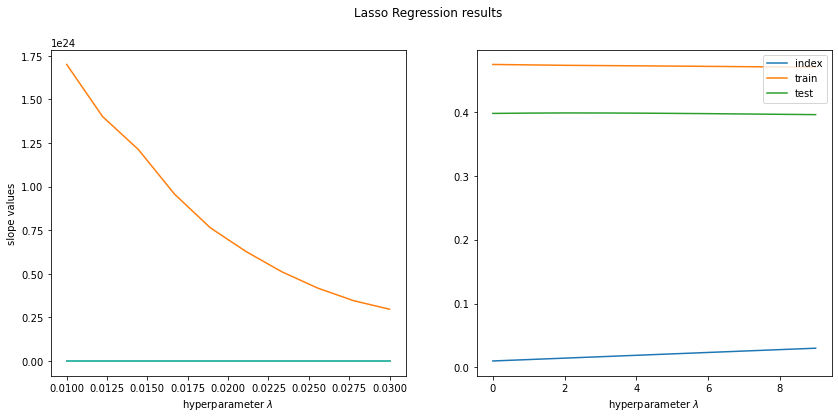

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)
# Takes forever. And still doesn't converge even with max_iter=10000

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(normalize = True)
lasso_pipe = Pipeline([
    ('standardize', StandardScaler()), 
    ('lasso', lasso)
])
params = {'lasso__alpha': np.linspace(0.01,0.03, 100)}

kfold = KFold(n_splits = 3, shuffle = True)
gs_ls = GridSearchCV(lasso_pipe, param_grid = params, scoring = 'r2', cv = tscv)
gs_ls.fit(X_train, y_train)

print("Estimator which gave the highest score: ", gs_ls.best_estimator_)
print("Mean cross-validated score of the best_estimator: ", gs_ls.best_score_)
print("The best parameters are: ", gs_ls.best_params_)

Estimator which gave the highest score:  Pipeline(steps=[('standardize', StandardScaler()),
                ('lasso', Lasso(alpha=0.011414141414141415, normalize=True))])
Mean cross-validated score of the best_estimator:  0.42540399172094484
The best parameters are:  {'lasso__alpha': 0.011414141414141415}


In [46]:
sorted(lasso_coefs.items(), key = lambda item: item[0], reverse = True)

NameError: name 'lasso_coefs' is not defined

In [50]:
lasso.set_params(alpha = 0.011414141414141415, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))

lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[1], reverse = True)
                    if v !=0}
print(len(lasso_coefs_keep))
lasso_coefs_keep

63


{'median_age': 24.19664517922497,
 'male_45_64_graduate_degree': 0.6271722605456067,
 'male_65_to_66': 0.48371507642645895,
 'male_85_and_over': 0.4697304588301178,
 'asian_male_55_64': 0.37493754486765185,
 'female_35_to_39': 0.25637327191404813,
 'black_male_55_64': 0.2187482346818146,
 'female_18_to_19': 0.20897477885870866,
 'male_67_to_69': 0.19652407033879013,
 'male_60_61': 0.18564919594709856,
 'female_30_to_34': 0.1824129130838508,
 'male_45_64_bachelors_degree': 0.1706702862391271,
 'male_70_to_74': 0.16381783055872168,
 'female_45_to_49': 0.14874089424696593,
 'female_65_to_66': 0.12792795306656318,
 'male_45_64_less_than_9_grade': 0.12163407588712452,
 'male_50_to_54': 0.10241744352675593,
 'female_40_to_44': 0.08853754955342448,
 'male_25_to_29': 0.08635646785759447,
 'other_race_pop': 0.07819255272546734,
 'hispanic_male_55_64': 0.06354181852444217,
 'female_22_to_24': 0.05979922541365944,
 'male_40_to_44': 0.05481163493389527,
 'female_70_to_74': 0.04659767798208127,
 'm

In [ ]:
#now do model selection for commute variables


In [51]:
#coefs_lasso.loc[0.2,coefs_lasso.loc[0.2,:] != 0].sort_values(ascending=False)

In [52]:
#coefs_lasso.loc[0.3,coefs_lasso.loc[0.3,:] != 0].sort_values(ascending=False)

In [53]:
#coefs_lasso.loc[0.4,coefs_lasso.loc[0.4,:] != 0].sort_values(ascending=False)

In [66]:
# Let's try running the model again with only the attributes that survived at alpha = 0.1
# alpha_0pt1_attr = coefs_lasso.loc[0.1,coefs_lasso.loc[0.1,:] != 0].sort_values(ascending=False).keys()
# alpha_0pt1_attr

Index(['hispanic_male_45_54', 'male_80_to_84', 'male_male_households',
       'million_dollar_housing_units', 'male_85_and_over', 'walked_to_work',
       'asian_male_55_64', 'employed_information',
       'dwellings_50_or_more_units', 'male_75_to_79',
       'dwellings_1_units_attached', 'commute_45_59_mins',
       'owner_occupied_housing_units_lower_value_quartile',
       'owner_occupied_housing_units_median_value', 'income_per_capita',
       'owner_occupied_housing_units_upper_value_quartile',
       'dwellings_20_to_49_units', 'white_pop', 'amerindian_pop',
       'dwellings_2_units', 'different_house_year_ago_same_city',
       'households_public_asst_or_food_stamps',
       'vacant_housing_units_for_rent'],
      dtype='object')

In [68]:
# X_0pt1 = X[alpha_0pt1_attr]
# X_0pt1

,hispanic_male_45_54,male_80_to_84,male_male_households,million_dollar_housing_units,male_85_and_over,walked_to_work,asian_male_55_64,employed_information,dwellings_50_or_more_units,male_75_to_79,dwellings_1_units_attached,commute_45_59_mins,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,income_per_capita,owner_occupied_housing_units_upper_value_quartile,dwellings_20_to_49_units,white_pop,amerindian_pop,dwellings_2_units,different_house_year_ago_same_city,households_public_asst_or_food_stamps,vacant_housing_units_for_rent
0,0,0,0,0,0,18,0,0,0,0,0,0,69100.0,138700.0,20743.0,227100.0,0,134,0,0,0.0,14,0
1,0,4,0,0,8,7,0,0,2,8,0,29,198200.0,314900.0,51602.0,425000.0,0,558,0,22,0.0,14,0
2,0,26,0,0,22,33,0,9,3,15,5,26,139800.0,193500.0,26035.0,254800.0,10,1212,3,20,0.0,86,10
3,18,30,0,14,14,26,0,0,0,87,0,0,75800.0,179700.0,20399.0,239300.0,0,2373,13,0,194.0,210,33
4,0,81,0,0,5,63,0,0,0,103,6,88,25500.0,38100.0,14566.0,68400.0,23,2845,0,44,145.0,324,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,15,56,6,43,20,29,0,42,0,75,38,133,274700.0,372100.0,38153.0,553100.0,0,2480,0,0,0.0,28,0
11932,1,25,0,44,0,8,0,0,0,29,34,7,162800.0,367900.0,55735.0,851600.0,0,656,0,77,0.0,0,32
11933,0,0,0,0,0,3,0,0,0,0,21,0,269100.0,327000.0,38667.0,385500.0,0,731,0,0,2.0,51,0
11934,0,0,0,0,0,0,0,0,0,40,0,58,190800.0,235100.0,19516.0,292100.0,0,986,0,32,0.0,0,0


In [69]:
# mlr = LinearRegression()
# mlr_0pt1 = []
# for i in range(100):
#     X_train, X_test, y_train, y_test = train_test_split(X_0pt1, y, test_size = 0.25)
#     mlr.fit(X_train, y_train)
#     mlr_0pt1.append(mlr.score(X_test, y_test))

In [54]:
# scores = pd.concat([pd.DataFrame({'score':mlr_0pt1,'model':'alpha 0.1'})
#                     ,pd.DataFrame({'score':mlr_lin,'model':'full'})
#                    ])
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [105]:
# # Now let's try running the model with alpha=0.1 100 times and averaging over the coefficients
# lasso = Lasso(max_iter=10000, normalize=True, alpha=0.1)
# coefs_lasso = []
# for _ in range(100):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#     lasso.fit(X_train, y_train)
#     coefs_lasso.append(lasso.coef_)  
# coefs_lasso = pd.DataFrame(coefs_lasso, index = range(100), columns = X_train.columns)

In [114]:
# attr = list(abs(coefs_lasso.mean(axis=0)).sort_values(ascending=False).keys())

In [55]:
# attr

In [109]:
#coefs_lasso.mean(axis=0).sort_values(ascending=False)

In [127]:
scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for a in attr: 
    if X_train.shape[1] > 1:
        X_train = X_train.drop(columns=a)
        X_test = X_test.drop(columns=a)
        mlr.fit(X_train, y_train)
        scores.append(mlr.score(X_test, y_test))

In [128]:
X_train.shape[1]

1

In [110]:
#scores

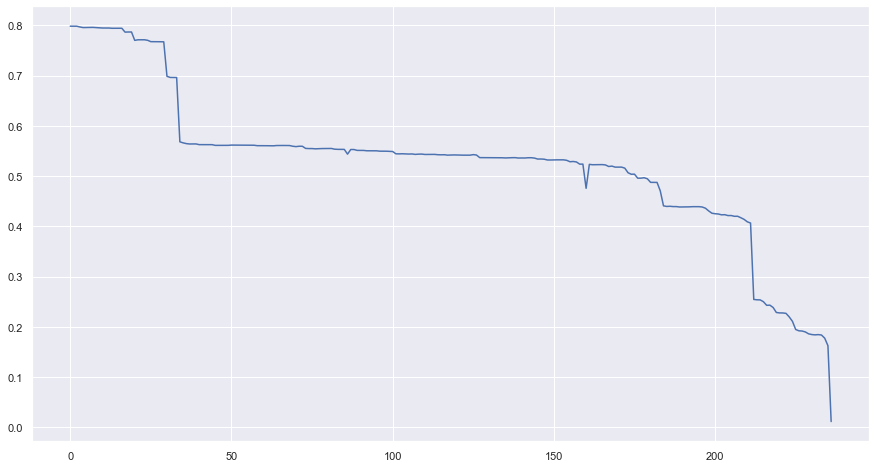

In [130]:
plt.plot(scores)
plt.show()

In [157]:
for i in range(10): 
    scores[i] = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train2 = pd.DataFrame()
    X_test2 = pd.DataFrame()
    for a in attr: 
        X_train2[a] = X_train[a]
        X_test2[a] = X_test[a]
        mlr.fit(X_train2, y_train)
        scores[i].append(mlr.score(X_test2, y_test))

In [158]:
scores_avg = []
for i in range(len(scores[1])):
    scores_avg.append()

238

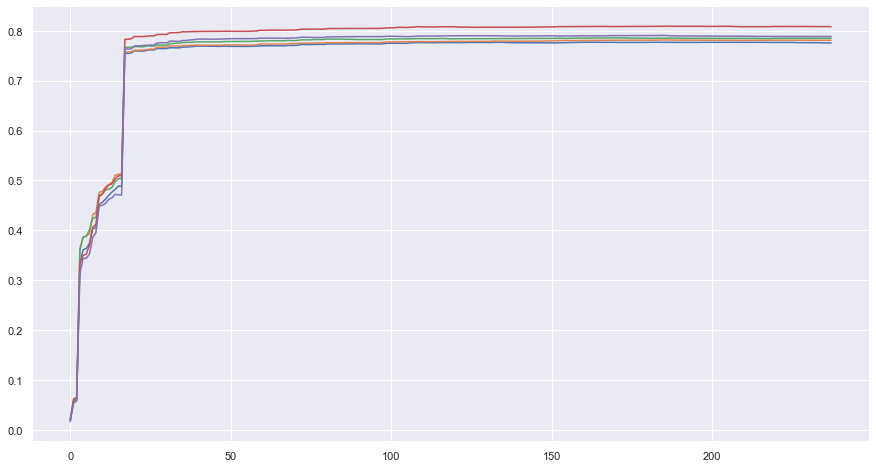

In [156]:
plt.plot(scores)
plt.plot(scores2)
plt.plot(scores3)
plt.plot(scores4)
plt.plot(scores5)
plt.show()

# Random Forest 🌳

In [32]:
model = ensemble.RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
%time model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))

CPU times: user 1min 48s, sys: 286 ms, total: 1min 48s
Wall time: 1min 48s
The training r2: 0.97100
The test     r2: 0.80333


In [21]:
model = ensemble.RandomForestRegressor()
fst_base_scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    model.fit(X_train, y_train)
    fst_base_scores.append(model.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
fst_data = pd.concat([#pd.DataFrame({'score':fst_scores,'model':'Tuned Parameters'}),
                  pd.DataFrame({'score':fst_base_scores,'model':'Default Parameters'})])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.6)
sns.kdeplot(data=fst_data, x="score", hue="model", fill=True, common_norm=False, alpha=0.4, linewidth=3)

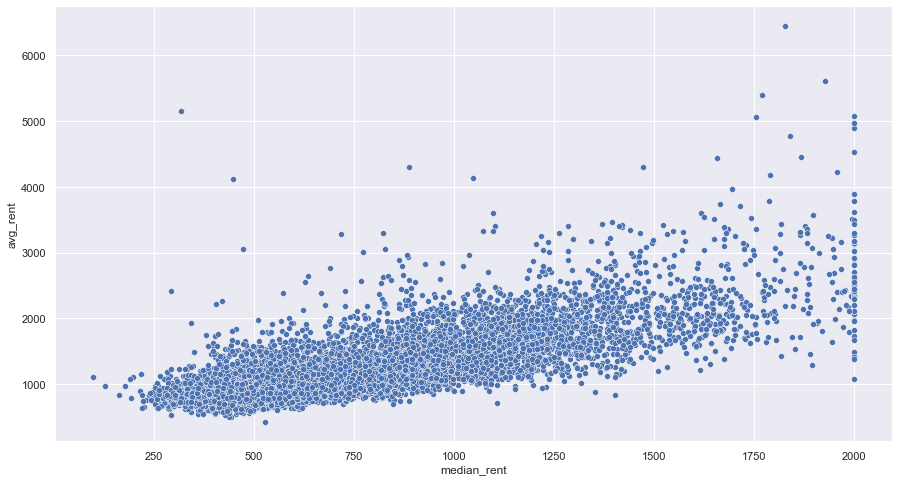

In [176]:
# So something weird is happening. Maybe we should look at the median_rent vs. avg_rent
sns.scatterplot(data=df[df.avg_rent<8000], x="median_rent", y="avg_rent")
#sns.scatterplot(data=df, x="median_rent", y="avg_rent")
#plt.ylim(0, 5000)
#plt.xlim(0, 2000)
plt.show()

In [161]:
# There are some really weird outliers here. Maybe we should look into these. 
df[df.avg_rent > 8000]

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,e